## Prediction of student performance based on study hours using Supervised ML

## Importing Libraries

In [1]:
# Importing the libraries which are used throughout the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Importing and Reading the Raw Data

In [2]:
# Importing and reading the raw data from the provided url using pandas
data_url = "http://bit.ly/w-data"
student_df = pd.read_csv(data_url)
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Visualizing the Raw Data

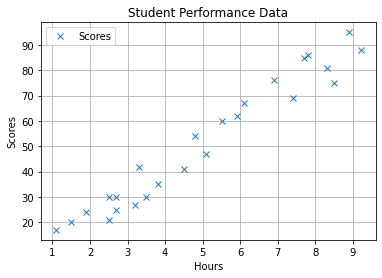

In [3]:
# Visualizing the raw data using matplotlib.pyplot
student_df.plot(x = "Hours", y = "Scores", style = "x")
plt.title("Student Performance Data")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

## Defining Features and Labels

In [4]:
# Splitting the raw data into Features and Labels
X = student_df["Hours"].values.reshape(-1,1) # Changing shape for model training
y = student_df["Scores"].values

In [5]:
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [6]:
y[:5]

array([21, 47, 27, 75, 30], dtype=int64)

## Splitting Features and Labels into Train and Test Data

In [7]:
# Splitting features and labels into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Model Training

In [8]:
# Creating model instance
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Regression model training completed !")

Regression model training completed !


## Visualizing the Regression Line

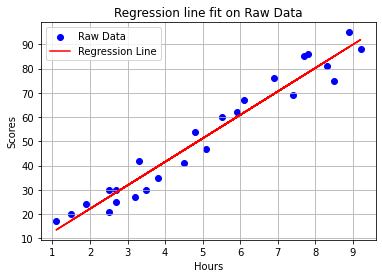

In [9]:
# Visualizing the regression line with raw data
reg_line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y, color = "blue", label = "Raw Data")
plt.plot(X, reg_line, color = "red", label = "Regression Line")
plt.title('Regression line fit on Raw Data') 
plt.xlabel("Hours")  
plt.ylabel("Scores")
plt.grid()
plt.legend()
plt.show()

## Model Prediction on Test Data

In [10]:
# Predicting the test labels
y_pred = regressor.predict(X_test)
print(y_test, y_pred)

[81 30 21 76 62] [83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


## Model Evaluation using Regression Metrics

In [11]:
# Evaluating the model using Regression metrics
mse_value = mean_squared_error(y_test, y_pred)
mae_value = mean_absolute_error(y_test, y_pred)
r2_value = r2_score(y_test, y_pred)
performance_df = pd.DataFrame({"MSE": [mse_value],
                              "MAE": [mae_value],
                              "r2_score": [r2_value]})
performance_df

,MSE,MAE,r2_score
0,18.943212,3.920751,0.967806


## Prediction on Task Question

In [12]:
# Predicting the task question
task_hour = np.array([9.25])
task_score = regressor.predict(task_hour.reshape(-1,1))
print("Student performance with 9.25 hours of study is:", task_score[0])

Student performance with 9.25 hours of study is: 92.38611528261494
